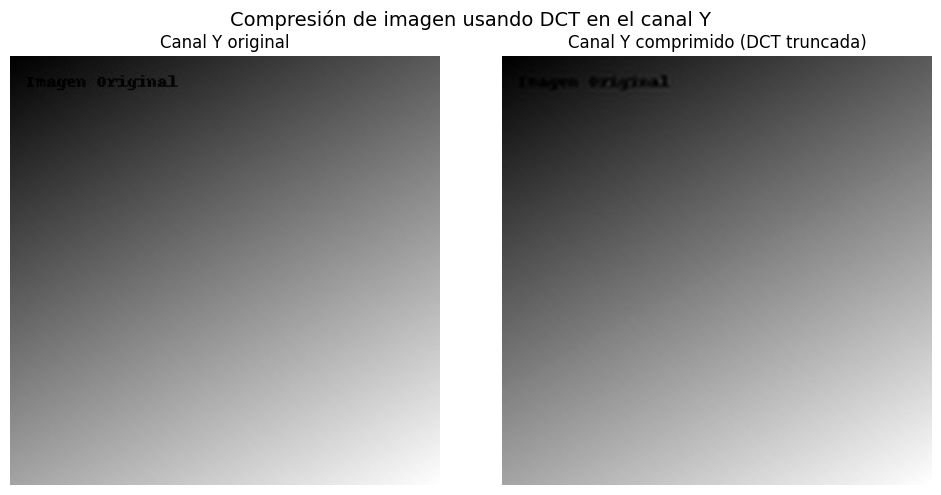

In [3]:
# === 1. Importamos las librerías necesarias ===
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct, idct

# === 2. Funciones para aplicar DCT e IDCT bidimensional ===
# La DCT bidimensional se aplica por filas y luego por columnas
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# La IDCT bidimensional reconstruye la imagen a partir de los coeficientes
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# === 3. Cargar la imagen original y convertirla a espacio YCbCr ===
# Este espacio separa la luminancia (Y) del color (Cb y Cr)
imagen = Image.open('original.jpg').convert('YCbCr')
y, cb, cr = imagen.split()  # Extraemos cada componente

# Convertimos el canal Y a un arreglo NumPy de tipo float
Y = np.array(y, dtype=float)

# === 4. Aplicar la DCT al canal Y ===
Y_dct = dct2(Y)

# === 5. Comprimir: truncar (eliminar) coeficientes de alta frecuencia ===
# Creamos una copia de los coeficientes
Y_dct_trunc = np.copy(Y_dct)

# Definimos cuántos coeficientes conservar: por ejemplo, el 50% superior izquierdo
rows, cols = Y_dct.shape
threshold_row = int(rows * 0.5)
threshold_col = int(cols * 0.5)

# Ponemos en cero las zonas de baja prioridad (alta frecuencia)
Y_dct_trunc[threshold_row:, :] = 0
Y_dct_trunc[:, threshold_col:] = 0

# === 6. Reconstruir la imagen con la IDCT ===
Y_recon = idct2(Y_dct_trunc)

# Aseguramos que los valores estén en el rango 0-255 para visualización
Y_recon = np.clip(Y_recon, 0, 255).astype(np.uint8)

# === 7. Mostrar resultados ===
# Mostramos la imagen original y la reconstruida (sólo luminancia Y)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Y, cmap='gray')
plt.title('Canal Y original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Y_recon, cmap='gray')
plt.title('Canal Y comprimido (DCT truncada)')
plt.axis('off')

plt.suptitle('Compresión de imagen usando DCT en el canal Y', fontsize=14)
plt.tight_layout()
plt.show()


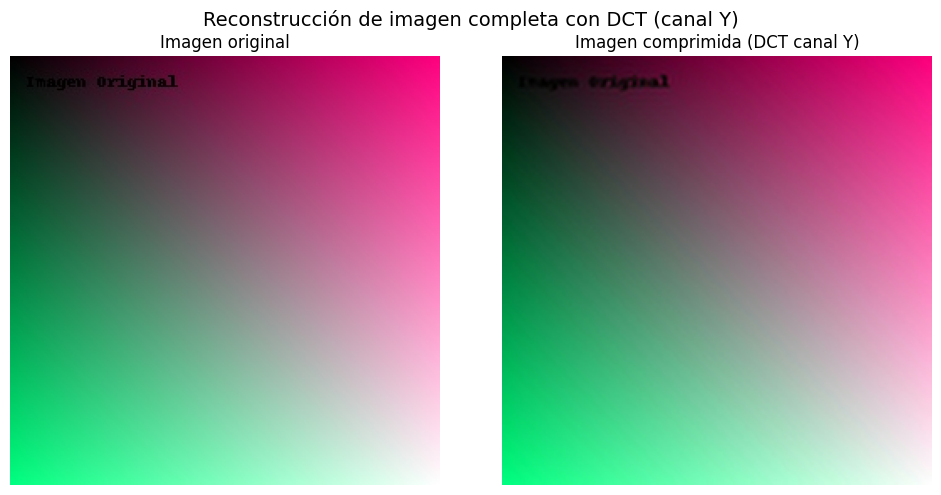

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct, idct

# === Funciones auxiliares para DCT 2D e IDCT 2D ===
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# === Paso 1: Cargar imagen y convertir a YCbCr ===
imagen = Image.open("original.jpg").convert('YCbCr')
y, cb, cr = imagen.split()

# Convertimos a matrices NumPy
Y = np.array(y, dtype=float)
Cb = np.array(cb)
Cr = np.array(cr)

# === Paso 2: Aplicar DCT solo al canal Y ===
Y_dct = dct2(Y)

# === Paso 3: Truncar los coeficientes de alta frecuencia ===
Y_dct_trunc = np.copy(Y_dct)
rows, cols = Y_dct.shape

# Retenemos solo el 50% superior izquierdo
thresh_row = int(rows * 0.5)
thresh_col = int(cols * 0.5)
Y_dct_trunc[thresh_row:, :] = 0
Y_dct_trunc[:, thresh_col:] = 0

# === Paso 4: Reconstruir el canal Y ===
Y_recon = idct2(Y_dct_trunc)
Y_recon = np.clip(Y_recon, 0, 255).astype(np.uint8)

# === Paso 5: Combinar Y comprimido con Cb y Cr originales ===
# Creamos nueva imagen en YCbCr
ycbcr_recon = Image.merge("YCbCr", (
    Image.fromarray(Y_recon),
    Image.fromarray(Cb),
    Image.fromarray(Cr)
))

# Convertimos a RGB para visualización
rgb_recon = ycbcr_recon.convert("RGB")

# === Paso 6: Mostrar imágenes ===
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(Image.open("original.jpg"))
plt.title("Imagen original")
plt.axis('off')

# Imagen comprimida
plt.subplot(1, 2, 2)
plt.imshow(rgb_recon)
plt.title("Imagen comprimida (DCT canal Y)")
plt.axis('off')

plt.suptitle("Reconstrucción de imagen completa con DCT (canal Y)", fontsize=14)
plt.tight_layout()
plt.show()


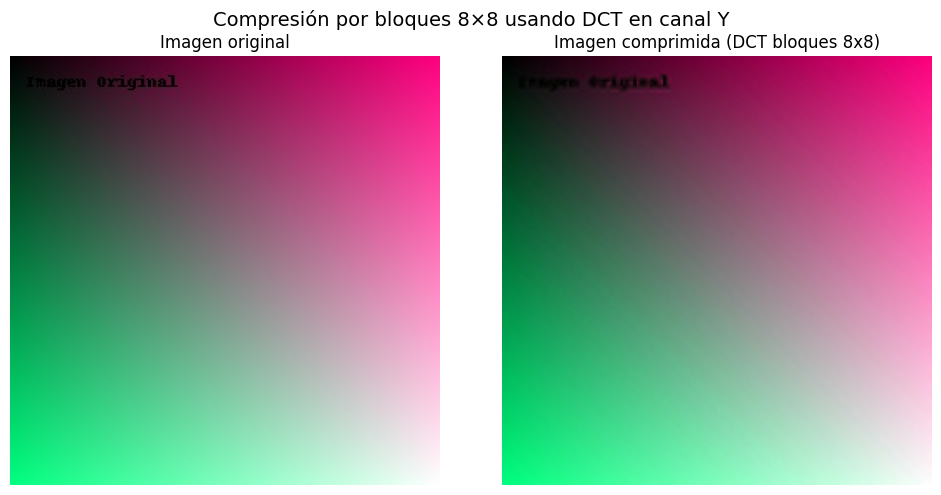

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct, idct

# --- Funciones auxiliares para DCT 2D por bloques ---
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# --- Función para procesar imagen por bloques ---
def procesar_por_bloques(im, funcion, bloque=8):
    h, w = im.shape
    salida = np.zeros_like(im)
    for i in range(0, h, bloque):
        for j in range(0, w, bloque):
            sub = im[i:i+bloque, j:j+bloque]
            salida[i:i+bloque, j:j+bloque] = funcion(sub)
    return salida

# --- Paso 1: Cargar y convertir imagen ---
imagen = Image.open("original.jpg").convert("YCbCr")
Y, Cb, Cr = imagen.split()

# Convertimos a numpy arrays
Y = np.array(Y, dtype=float)
Cb = np.array(Cb)
Cr = np.array(Cr)

# --- Paso 2: Aplicar DCT por bloques al canal Y ---
Y_dct = procesar_por_bloques(Y, dct2)

# --- Paso 3: Truncar los coeficientes altos (como compresión) ---
def truncar_bloque(block, keep=4):
    bloque_trunc = np.zeros_like(block)
    for i in range(keep):
        for j in range(keep):
            bloque_trunc[i, j] = block[i, j]
    return bloque_trunc

Y_dct_trunc = procesar_por_bloques(Y_dct, lambda b: truncar_bloque(b, keep=4))

# --- Paso 4: IDCT por bloques para reconstrucción del canal Y ---
Y_reconstruido = procesar_por_bloques(Y_dct_trunc, idct2)
Y_reconstruido = np.clip(Y_reconstruido, 0, 255).astype(np.uint8)

# --- Paso 5: Reunir imagen y convertir a RGB ---
img_recon = Image.merge("YCbCr", (
    Image.fromarray(Y_reconstruido),
    Image.fromarray(Cb),
    Image.fromarray(Cr)
)).convert("RGB")

# --- Paso 6: Visualizar ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Image.open("original.jpg"))
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_recon)
plt.title("Imagen comprimida (DCT bloques 8x8)")
plt.axis("off")

plt.suptitle("Compresión por bloques 8×8 usando DCT en canal Y", fontsize=14)
plt.tight_layout()
plt.show()


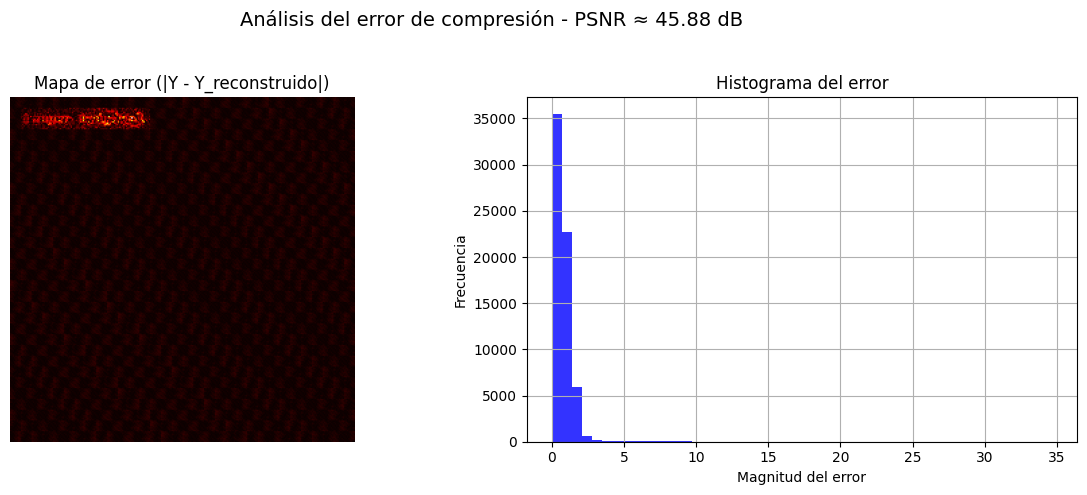

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import dct, idct

# Paso 1: Cargar la imagen original
img_rgb = cv2.imread("original.jpg")
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
img_ycc = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb).astype(np.float32)

# Extraer el canal Y (luminancia)
Y = img_ycc[:, :, 0]

# Paso 2: Definir la DCT 2D e IDCT 2D (norma ortonormal)
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Paso 3: Aplicar DCT por bloques 8x8, cuantificación y reconstrucción
def compress_dct(Y, Q):
    h, w = Y.shape
    Y_dct = np.zeros_like(Y)
    Y_quant = np.zeros_like(Y)

    # Cuantificación simulada por bloques
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = Y[i:i+8, j:j+8]
            dct_block = dct2(block)
            quant_block = np.round(dct_block / Q)
            Y_quant[i:i+8, j:j+8] = quant_block
    return Y_quant

def decompress_dct(Y_quant, Q):
    h, w = Y_quant.shape
    Y_reconstructed = np.zeros_like(Y_quant)

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = Y_quant[i:i+8, j:j+8]
            idct_block = idct2(block * Q)
            Y_reconstructed[i:i+8, j:j+8] = idct_block
    return np.clip(Y_reconstructed, 0, 255)

# Matriz de cuantificación tipo JPEG (suave para evitar pérdidas fuertes)
Q = np.array([[16,11,10,16,24,40,51,61],
              [12,12,14,19,26,58,60,55],
              [14,13,16,24,40,57,69,56],
              [14,17,22,29,51,87,80,62],
              [18,22,37,56,68,109,103,77],
              [24,35,55,64,81,104,113,92],
              [49,64,78,87,103,121,120,101],
              [72,92,95,98,112,100,103,99]], dtype=np.float32)

# Paso 4: Compresión y reconstrucción del canal Y
Y_quant = compress_dct(Y, Q)
Y_rec = decompress_dct(Y_quant, Q)

# Paso 5: Calcular mapa de error absoluto y PSNR
error = np.abs(Y - Y_rec)
mse = np.mean((Y - Y_rec)**2)
psnr = 10 * np.log10(255**2 / mse)

# Paso 6: Graficar mapa de error y su histograma
plt.figure(figsize=(12, 5))
plt.suptitle(f"Análisis del error de compresión - PSNR ≈ {psnr:.2f} dB", fontsize=14)

# Mapa de error
plt.subplot(1, 2, 1)
plt.imshow(error, cmap='hot')
plt.title("Mapa de error (|Y - Y_reconstruido|)")
plt.axis('off')

# Histograma de errores
plt.subplot(1, 2, 2)
plt.hist(error.flatten(), bins=50, color='blue', alpha=0.8)
plt.title("Histograma del error")
plt.xlabel("Magnitud del error")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
